# Summery

For the study we took the diabetes dataset that can be found using the link below. The dataset references many metrics for example age, sex, bmi (body mass index) and bp (blood pressure). To facilitate polynomial regression, I selected bmi as my independent variable and the target at my dependent variable.

A **linear regression** model was initially used. This model is similar to what you learn in basic algebra with the function y = mx+b where x is your independent variable and y is the dependent/predicted value.

A **polynomial regression** model was also used to fit the data better. Polynomial regression’s function can be shown as y = A0 + A1x + A2x^2...Anx^n. An example is shown how the degree changing will fit the data dependent data better.

**One big thing I learned** from this report that polynomial regression is still only a model that has a one-to-one relationship. Predicting something like diabetes has multiple independent variables that all account for why a person can have diabetes. Polynomial and linear regression can only look at one of those variables at a time. Hence why a model like neural networks or genetic algorithms.


Dataset: https://bit.ly/3trr7aY

In [1]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import neighbors, datasets, preprocessing
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.datasets import load_diabetes
from numpy.polynomial import Polynomial

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Importing the diabetes data set.

In [2]:
diabetes = load_diabetes()

Analyzing the diabetes data set.

In [3]:
features, target = load_diabetes(return_X_y=True, as_frame=True)
table = pd.DataFrame(features, columns=list(diabetes.feature_names))
table["target"] = diabetes.target
table.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


In [4]:
# Coloumn used as dependent variable for regression models in this case bmi
column = 0

Pre-process the data as necessary to ensure that all values can be processed using a regression model.

In [5]:
# Split the data 80%/20%
train_data, test_data, train_label, test_label = train_test_split(diabetes.data[:, np.newaxis, 2],
                                                  diabetes.target,
                                                  train_size = 0.8)

### Size

In [6]:
print(f"Train: {train_data.shape}, Label: {train_label.shape}")
print(f"Test: {test_data.shape}, Label: {test_label.shape}")

Train: (353, 1), Label: (353,)
Test: (89, 1), Label: (89,)


### Scatter Matrix

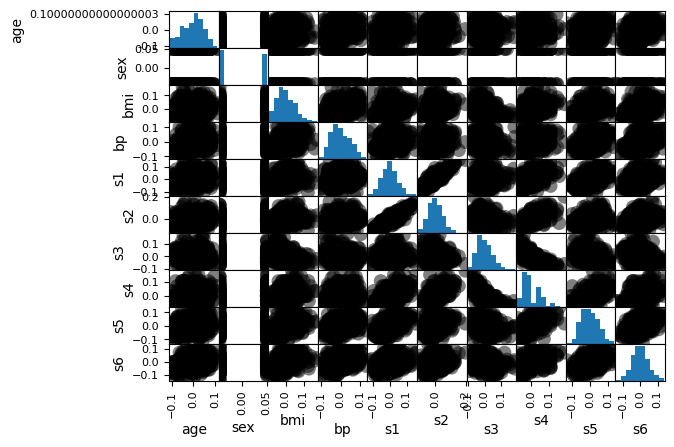

In [7]:
df = pd.DataFrame(diabetes.data, columns = diabetes.feature_names)
pd.plotting.scatter_matrix(df,s=400,c='black')
plt.rcParams["figure.figsize"] = (15, 15)

# Linear Regression

Coefficient: or m in y = mx+b: [954.05442196]
Mean squared error: 4014.82
Coefficient of determination: 0.30


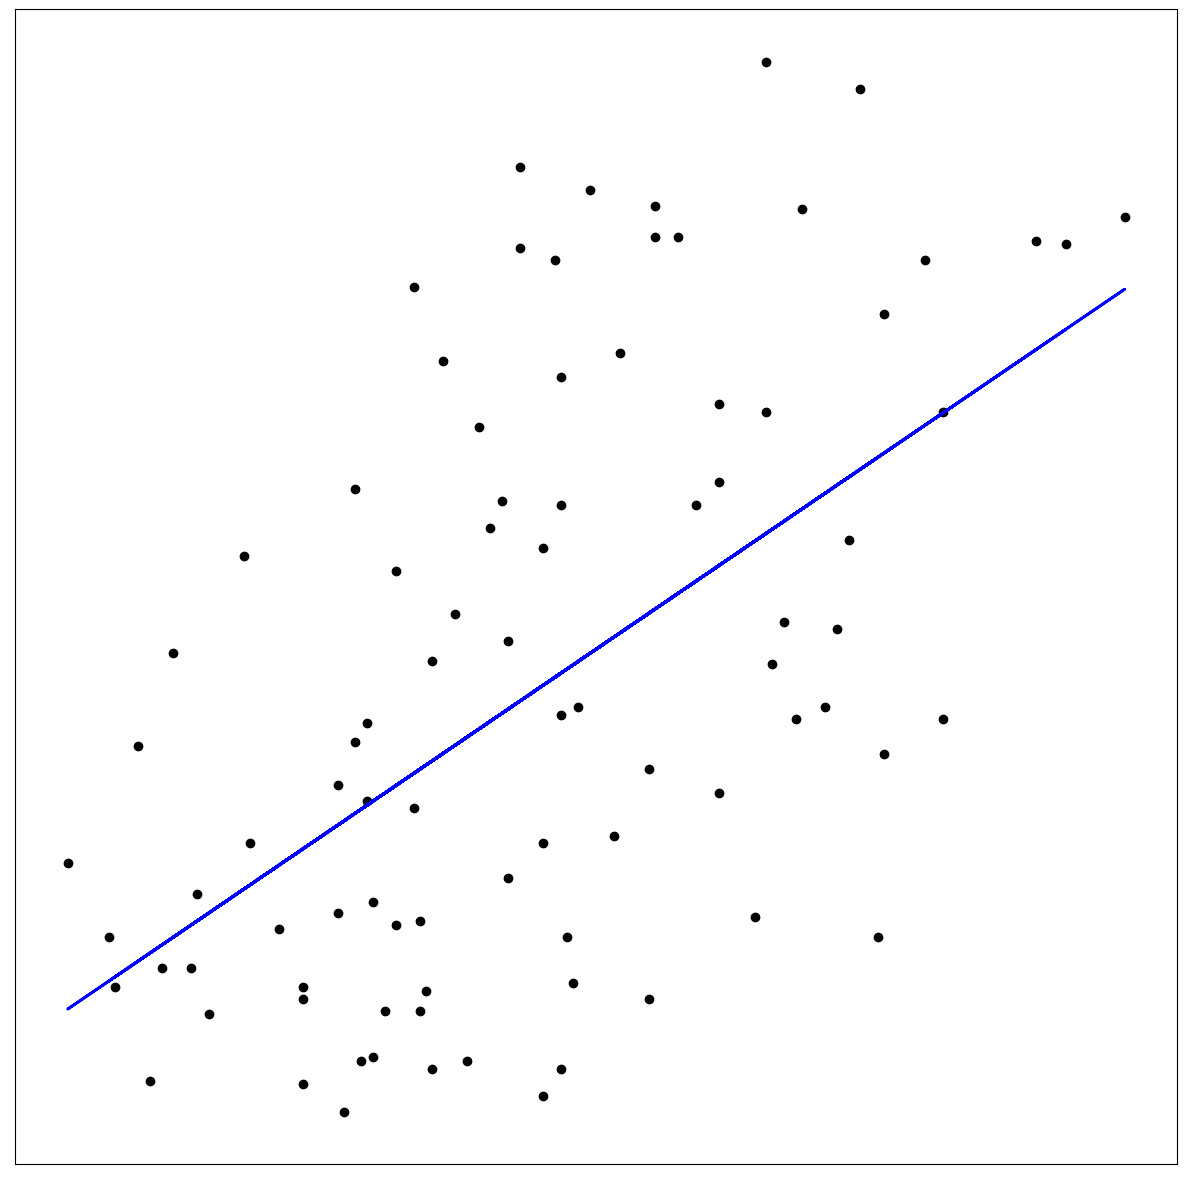

In [8]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(train_data, train_label)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(test_data)

# The coefficients
print(f"Coefficient: or m in y = mx+b: {regr.coef_}")
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(test_label, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(test_label, diabetes_y_pred))

# Plot outputs
plt.scatter(test_data, test_label, color="black")
plt.plot(test_data, diabetes_y_pred, color="blue", linewidth=2)

plt.xticks(())
plt.yticks(())

plt.show()

# Polynomial Regresssion and Model with Regularization

In [9]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

Coefficients for A + Ax + Ax^2 + Ax^n: 
: [[ 0.00000000e+00  1.28943541e+03 -1.25299757e+04 -1.33087452e+05
   1.64611578e+06  6.90051401e+06]]

Mean squared error: 4014.82


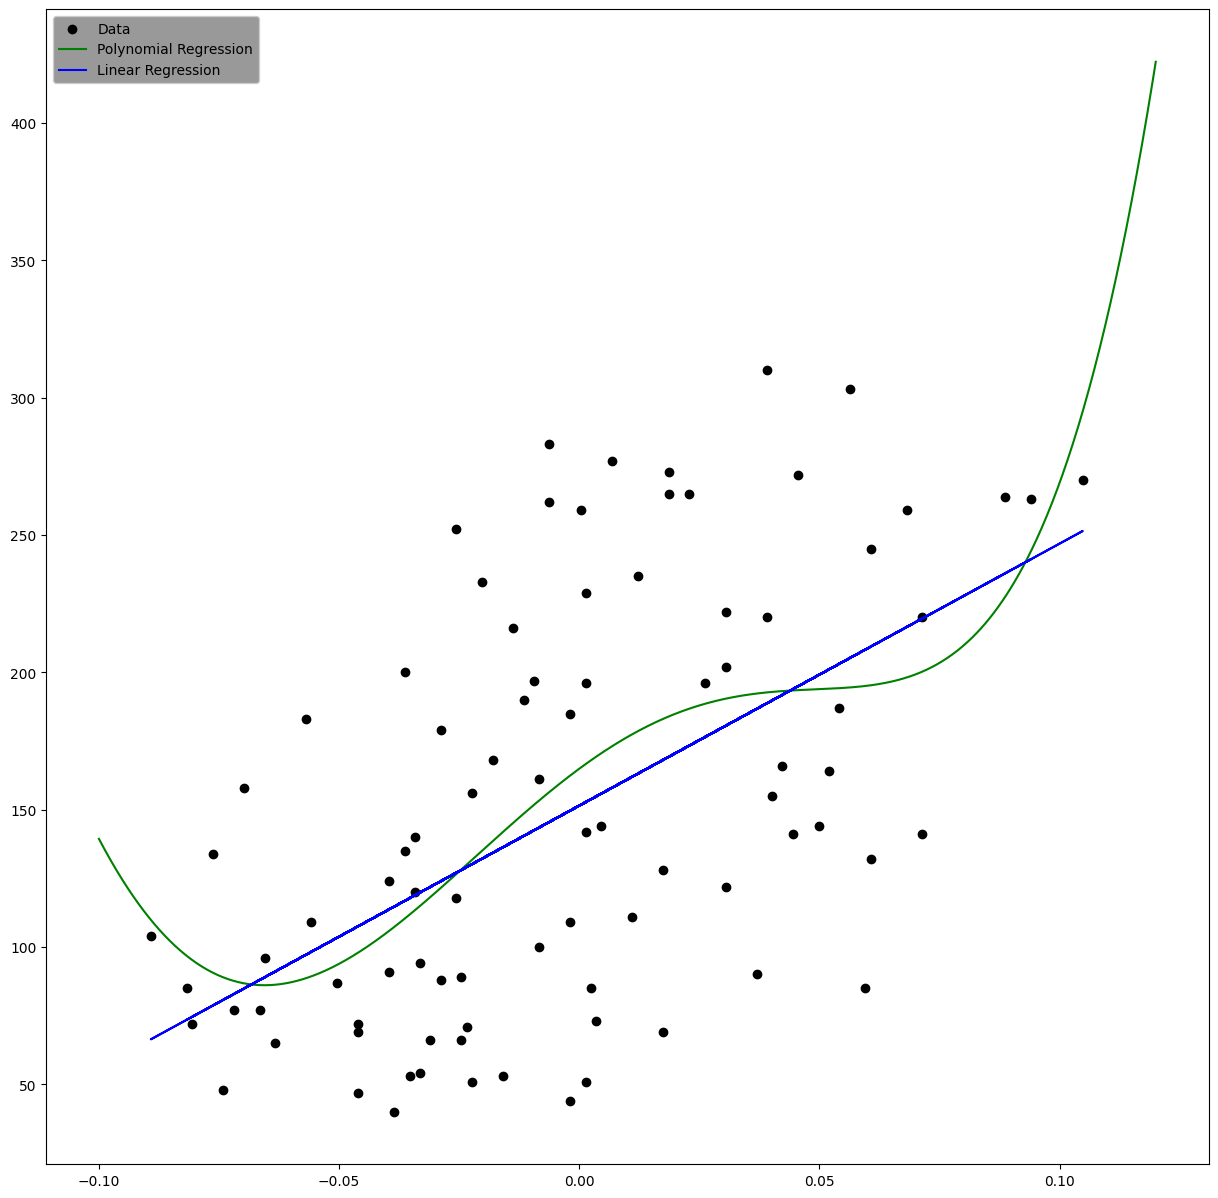

In [10]:
x = test_data
y = test_label
degree = 5

sample_space = np.linspace(-0.10,0.12,1000)[:,np.newaxis]

poly = PolynomialFeatures(degree=degree)

x_train_pf=poly.fit_transform(x)
x_test_pf=poly.fit_transform(y.reshape(-1, 1))

xx_pf=poly.fit_transform(sample_space)

# Use linear regression to fit our poly model
poly_model = linear_model.LinearRegression()
poly_model.fit(x_train_pf,y.reshape(-1, 1))

# The coefficients
print(f"Coefficients for A + Ax + Ax^2 + Ax^n: \n: {poly_model.coef_}\n")

print("Mean squared error: %.2f" % mean_squared_error(test_label, diabetes_y_pred))

plt.scatter(test_data, test_label, color="black", label="Data")
plt.plot(sample_space,poly_model.predict(xx_pf),'g-',label="Polynomial Regression")
plt.plot(test_data, diabetes_y_pred, color="blue",label="Linear Regression")
plt.legend(facecolor="grey")

### Showing how the number of degrees effects the model.

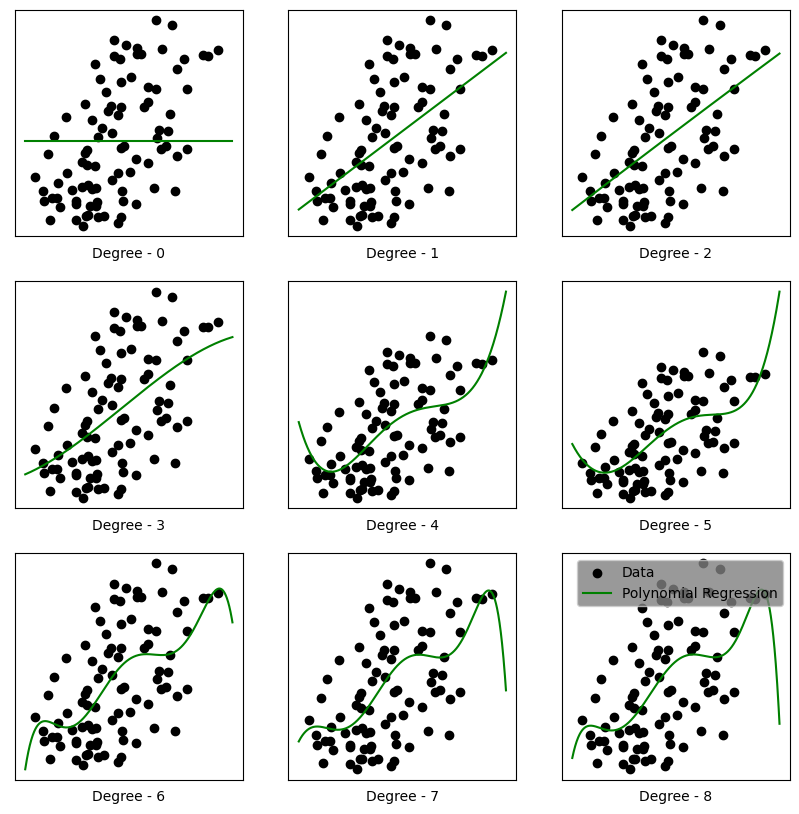

In [11]:
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False) 

    poly = PolynomialFeatures(degree=i)

    x_train_pf=poly.fit_transform(x)
    x_test_pf=poly.fit_transform(y.reshape(-1, 1))

    xx_pf=poly.fit_transform(sample_space)

    # Use linear regression to fit our poly model
    poly_model = linear_model.LinearRegression()
    poly_model.fit(x_train_pf,y.reshape(-1, 1))

    plt.scatter(test_data, test_label, color="black", label="Data")
    plt.plot(sample_space,poly_model.predict(xx_pf),'g-',label="Polynomial Regression")
    plt.xlabel(f"Degree - {i}")

plt.legend(facecolor="grey")
plt.show()